In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_Data.csv to Test_Data.csv
Saving Train_Data.csv to Train_Data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
os.getcwd()
os.listdir(os.getcwd())

['.config', 'Train_Data.csv', 'Test_Data.csv', 'sample_data']

In [ ]:
df = pd.read_csv('Train_Data.csv')
df['ctr'] = (df.clicks)/df.impressions
df['cpc'] = df.cost/df.clicks
df['cpa'] = df.cost/df.conversions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
 9   ctr          4571 non-null   float64
 10  cpc          4127 non-null   float64
 11  cpa          4127 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 428.7+ KB


In [ ]:
# Converting timestamp into day, month training data set

df['date'] = pd.to_datetime(df['date'])

df['Month'] = df['date'].dt.month
df['Day of the month'] = df['date'].dt.day
df['Year'] = df['date'].dt.year

df = df.drop(['date'], axis=1)


In [ ]:
# Converting timestamp into day, month testing data set

pf['date'] = pd.to_datetime(pf['date'])

pf['Month'] = pf['date'].dt.month
pf['Day of the month'] = pf['date'].dt.day
pf['Year'] = pf['date'].dt.year

pf = pf.drop(['date'], axis=1)
pf



,campaign,adgroup,ad,cost,impressions,clicks,conversions,ctr,cpc,cpa,Month,Day of the month
0,campaign 1,adgroup 1,ad 1,0.58,121,49,1,0.404959,0.011837,0.580000,1,3
1,campaign 1,adgroup 3,ad 1,0.17,22,12,0,0.545455,0.014167,0.356667,1,3
2,campaign 1,adgroup 4,ad 1,0.05,5,3,0,0.600000,0.016667,0.356667,1,3
3,campaign 1,adgroup 2,ad 1,0.01,2,1,0,0.500000,0.010000,0.356667,1,3
4,campaign 1,adgroup 2,ad 2,0.01,3,1,0,0.333333,0.010000,0.356667,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
313,campaign 1,adgroup 4,ad 55,0.01,1,1,0,1.000000,0.010000,0.356667,3,15
314,campaign 1,adgroup 3,ad 55,0.01,5,1,0,0.200000,0.010000,0.356667,3,15
315,campaign 1,adgroup 1,ad 55,0.14,25,11,0,0.440000,0.012727,0.356667,3,15
316,campaign 1,adgroup 3,ad 56,0.06,9,4,0,0.444444,0.015000,0.356667,3,15


BEst possible achievable by std. scaler training & test data including raw metrics+hot_encoded_adgrp and applying RandForestRegg(rstate=1)


In [ ]:
pf.columns

Index(['campaign', 'adgroup', 'ad', 'cost', 'impressions', 'clicks',
       'conversions', 'ctr', 'cpc', 'cpa', 'Month', 'Day of the month'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


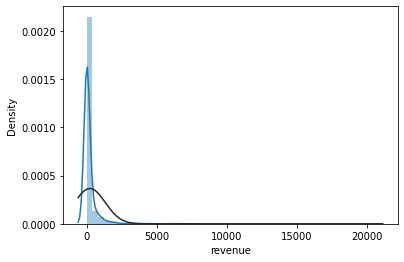

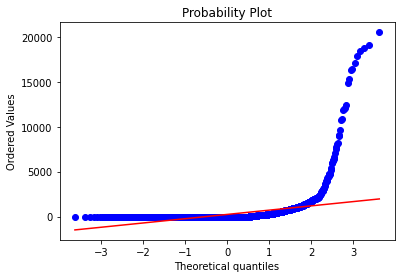

In [ ]:
# Target variable analysis , normal plot 
from scipy import stats
from scipy.stats import norm

sns.distplot(df['revenue'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['revenue'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


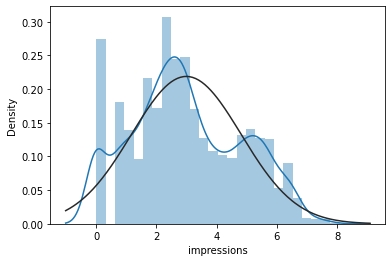

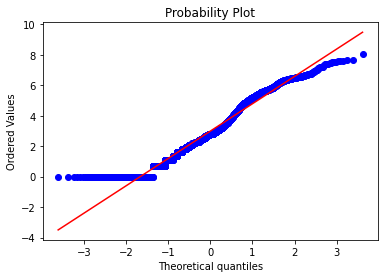

In [ ]:
df['impressions'] = np.log(df.impressions)
sns.distplot(df['impressions'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['impressions'], plot=plt)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


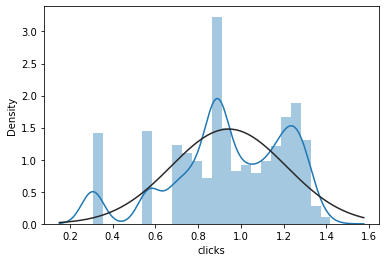

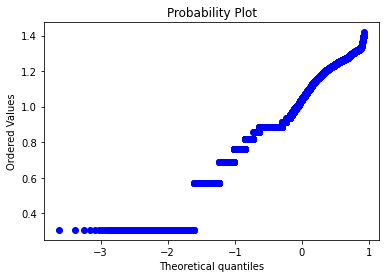

In [ ]:
df['clicks'] = np.sqrt(df.clicks)
sns.distplot(df['clicks'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['clicks'], plot=plt)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


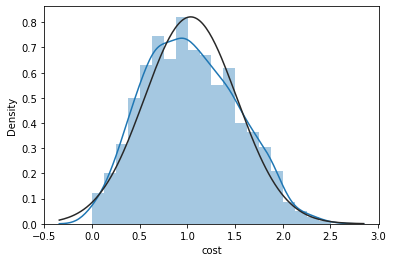

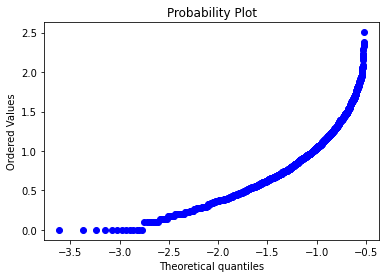

In [ ]:
df['cost'] = np.sqrt(df.cost)
sns.distplot(df['cost'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['cost'], plot=plt)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


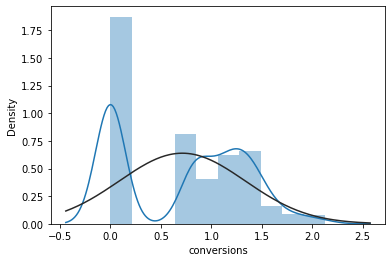

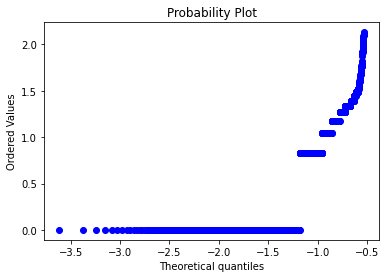

In [ ]:
df['conversions'] = np.sqrt(df.conversions)
sns.distplot(df['conversions'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['conversions'], plot=plt)

Whoa!! its normllly diatributed....

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2403: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: ignored

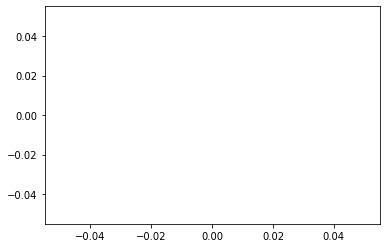

In [ ]:
 #Transformation using log func

df['revenue'] = np.log(df['revenue'])
sns.distplot(df['revenue'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['revenue'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


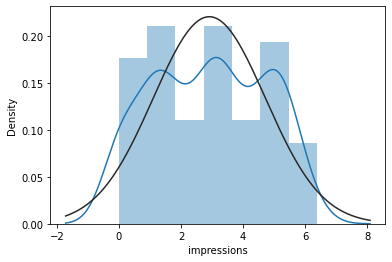

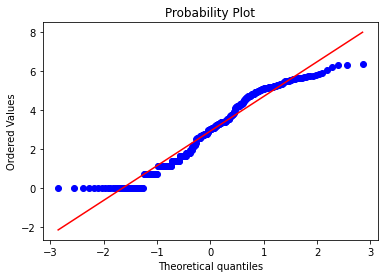

In [ ]:
pf.impressions = np.log(pf.impressions)
sns.distplot(pf['impressions'], fit=norm);
fig = plt.figure()
res = stats.probplot(pf['impressions'], plot=plt)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


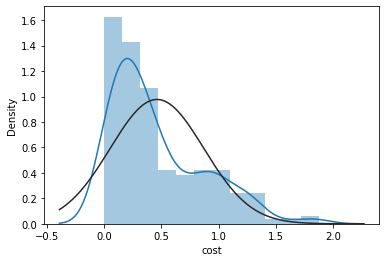

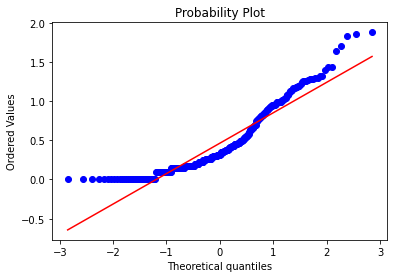

In [ ]:
pf.cost = np.sqrt(pf.cost)
sns.distplot(pf['cost'], fit=norm);
fig = plt.figure()
res = stats.probplot(pf['cost'], plot=plt)



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


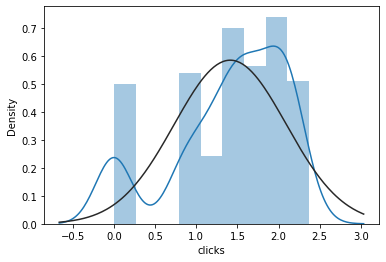

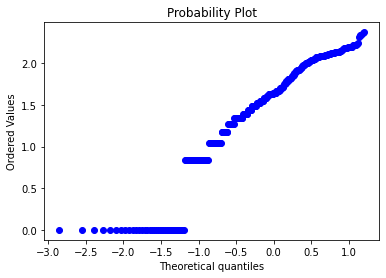

In [ ]:
pf.clicks = np.sqrt(pf.clicks)
sns.distplot(pf['clicks'], fit=norm);
fig = plt.figure()
res = stats.probplot(pf['clicks'], plot=plt)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


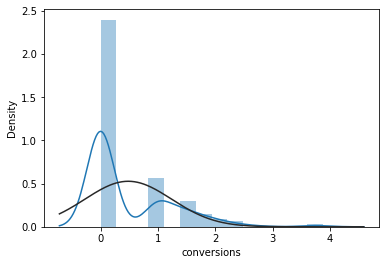

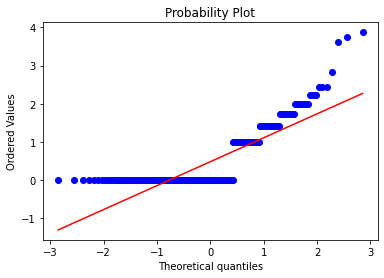

In [ ]:
pf.conversions = np.sqrt(pf.conversions)
sns.distplot(pf['conversions'], fit=norm);
fig = plt.figure()
res = stats.probplot(pf['conversions'], plot=plt)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(),inplace=True)

print(df.isnull().sum())

campaign            0
adgroup             0
ad                  0
impressions         0
clicks              0
cost                0
conversions         0
revenue             0
ctr                 0
cpc                 0
cpa                 0
Month               0
Day of the month    0
dtype: int64


In [ ]:
# ONe HOT ENCODING
#dum1 = pd.get_dummies(df.campaign)
#df = pd.concat([df,dum1],axis='columns')
df.drop(['campaign'],axis='columns',inplace=True)
df.columns
pf.drop(['campaign'],axis='columns',inplace=True)
pf.columns


Index(['adgroup', 'ad', 'cost', 'impressions', 'clicks', 'conversions', 'ctr',
       'cpc', 'cpa', 'Month', 'Day of the month'],
      dtype='object')

In [ ]:
print(df.adgroup.describe())
print(pf.adgroup.describe())

count          4571
unique            4
top       adgroup 3
freq           1672
Name: adgroup, dtype: object
count           318
unique            4
top       adgroup 3
freq            111
Name: adgroup, dtype: object


In [ ]:
#One hot encoding for adgroup having 4 categorcal values.
dum1 = pd.get_dummies(df.adgroup)
dum2 = pd.get_dummies(pf.adgroup)
df = pd.concat([df,dum1],axis='columns')
pf = pd.concat([pf,dum2],axis='columns')
df.drop(['adgroup'],axis='columns',inplace=True)
pf.drop(['adgroup'],axis='columns',inplace=True)

NameError: ignored

In [ ]:
df.columns
pf.columns
print(df.ad)
print(pf.ad)

0        ad 1
1        ad 1
2        ad 1
3        ad 1
4        ad 2
        ...  
4566    ad 55
4567    ad 55
4568    ad 56
4569    ad 56
4570    ad 55
Name: ad, Length: 4571, dtype: object
0       ad 1
1       ad 1
2       ad 1
3       ad 1
4       ad 2
       ...  
313    ad 55
314    ad 55
315    ad 55
316    ad 56
317    ad 56
Name: ad, Length: 318, dtype: object


In [ ]:
dum3 = pd.get_dummies(df.ad)
dff = pd.concat([df,dum3],axis='columns')
dff.drop(['ad'],axis='columns',inplace=True)
dum4 = pd.get_dummies(pf.ad)
pff = pd.concat([pf,dum4],axis='columns')
pff.drop(['ad'],axis='columns',inplace=True)

In [ ]:
print(dff.columns)
print(pff.columns)

Index(['date', 'impressions', 'clicks', 'cost', 'conversions', 'revenue',
       'ctr', 'cpc', 'cpa', 'adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4',
       'z_clicks', 'z_imp', 'z_ctr', 'z_cpc', 'z_cost', 'z_conv', 'ad 1',
       'ad 10', 'ad 11', 'ad 12', 'ad 13', 'ad 14', 'ad 15', 'ad 16', 'ad 17',
       'ad 18', 'ad 19', 'ad 2', 'ad 20', 'ad 21', 'ad 22', 'ad 23', 'ad 24',
       'ad 25', 'ad 26', 'ad 27', 'ad 28', 'ad 29', 'ad 3', 'ad 30', 'ad 31',
       'ad 32', 'ad 33', 'ad 34', 'ad 35', 'ad 36', 'ad 37', 'ad 38', 'ad 39',
       'ad 4', 'ad 40', 'ad 41', 'ad 42', 'ad 43', 'ad 44', 'ad 45', 'ad 46',
       'ad 47', 'ad 48', 'ad 49', 'ad 5', 'ad 50', 'ad 51', 'ad 52', 'ad 53',
       'ad 54', 'ad 55', 'ad 56', 'ad 57', 'ad 58', 'ad 59', 'ad 6', 'ad 60',
       'ad 61', 'ad 62', 'ad 63', 'ad 64', 'ad 65', 'ad 66', 'ad 67', 'ad 68',
       'ad 69', 'ad 7', 'ad 70', 'ad 8', 'ad 9'],
      dtype='object')
Index(['date', 'cost', 'impressions', 'clicks', 'conversions', 'ctr', 'cp

In [ ]:
f1 = ['impressions', 'clicks', 'cost','adgroup 1', 'Month', 'Day of the month', 'adgroup 2', 'adgroup 3', 'adgroup 4']
#df['ad'] =  df['ad'].str.replace(' ','_')

In [ ]:
X = df[f1]
#X = pd.get_dummies(X)
print(X.columns)
y = df.revenue
y.head

Index(['impressions', 'clicks', 'cost', 'adgroup 1', 'Month',
       'Day of the month', 'adgroup 2', 'adgroup 3', 'adgroup 4'],
      dtype='object')


<bound method NDFrame.head of 0         0.00
1         0.00
2         0.00
3         0.00
4       925.71
         ...  
4566      0.00
4567      0.00
4568     93.20
4569      0.00
4570      0.00
Name: revenue, Length: 4571, dtype: float64>

In [ ]:
X_new = X[['impressions', 'clicks', 'cost', 'conversions', 'ad_ad 1', 'ad_ad 10',
       'ad_ad 2', 'ad_ad 3', 'ad_ad 4', 'ad_ad 5', 'ad_ad 55', 'ad_ad 56',
       'ad_ad 6', 'ad_ad 7', 'ad_ad 71', 'ad_ad 72', 'ad_ad 73', 'ad_ad 74',
       'ad_ad 75', 'ad_ad 8']]


KeyError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcb5402790>]],
      dtype=object)

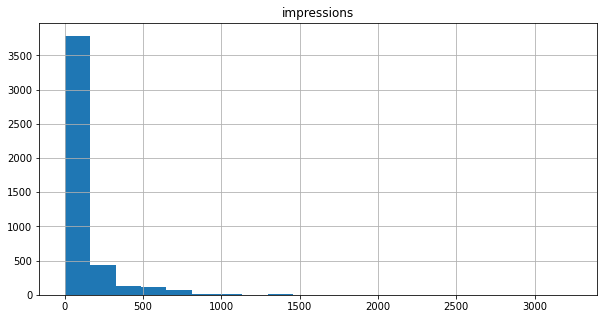

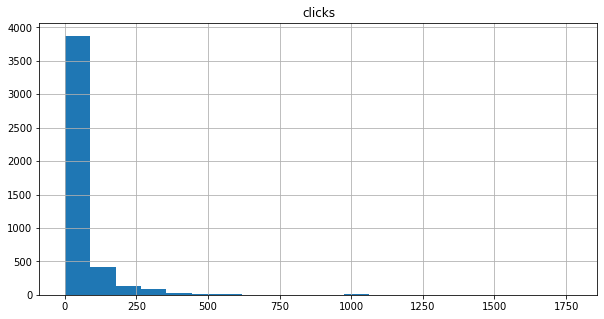

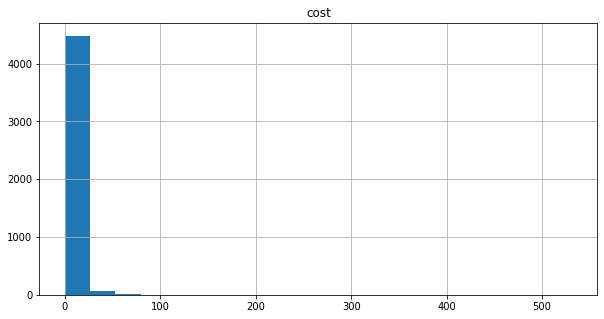

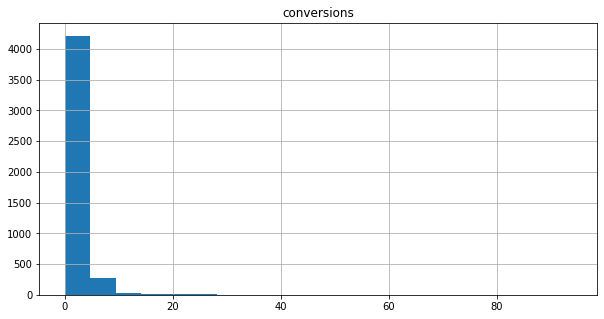

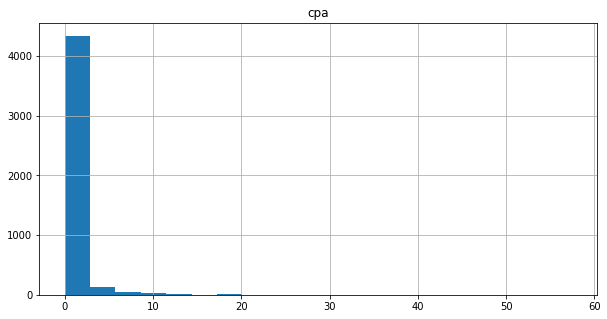

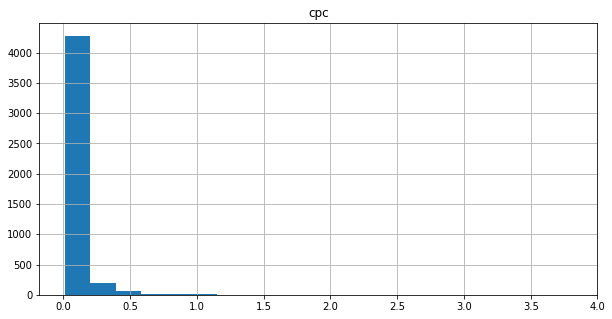

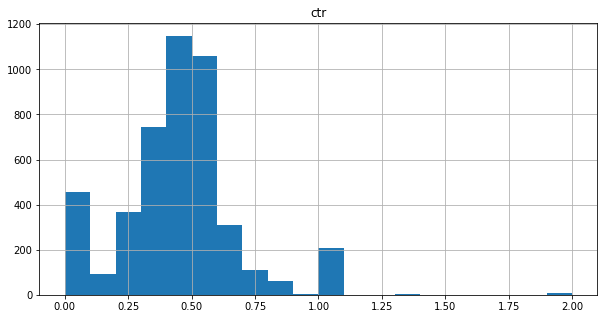

In [ ]:
#Plot
df.hist(column='impressions',bins=20,figsize=(10,5))
df.hist(column='clicks',bins=20,figsize=(10,5))
df.hist(column='cost',bins=20,figsize=(10,5))
df.hist(column='conversions',bins=20,figsize=(10,5))
df.hist(column='cpa',bins=20,figsize=(10,5))
df.hist(column='cpc',bins=20,figsize=(10,5))
df.hist(column='ctr',bins=20,figsize=(10,5))

In [ ]:
#Outlier detection and removal
#for cpa
print(df.columns)
a1,a2 = df.clicks.mean(),df.clicks.std()
df['z_clicks'] = (df.clicks-a1)/a2
b1,b2 = df.impressions.mean(),df.impressions.std()
df['z_imp'] = (df.impressions-b1)/b2
#c1,c2 = df.cpa.ean(),df.cpa.std()
#df['z_cpa'] = (df.cpa-c1)/c2
d1,d2 = df.ctr.mean(),df.ctr.std()
df['z_ctr'] = (df.ctr-d1)/d2
e1,e2 = df.cpc.mean(),df.cpc.std()
df['z_cpc'] = (df.cpc-e1)/e2
f1,f2 = df.cost.mean(),df.cost.std()
df['z_cost']=(df.cost-f1)/f2
g1,g2 = df.conversions.mean(),df.conversions.std()
df['z_conv'] = (df.conversions-g1)/g2

print(df[(df.z_clicks>3)|(df.z_clicks<-3)])
print(df[(df.z_imp>3)|(df.z_imp<-3)])
print(df[(df.z_ctr>3)|(df.z_ctr<-3)])
print(df[(df.z_cpc>3)|(df.cpc<-3)])
print(df[(df.z_cost>3)|(df.z_cost<-3)])
print(df[(df.z_conv>3)|(df.z_conv<-3)])


Index(['date', 'ad', 'impressions', 'clicks', 'cost', 'conversions', 'revenue',
       'ctr', 'cpc', 'cpa', 'adgroup 1', 'adgroup 2', 'adgroup 3',
       'adgroup 4'],
      dtype='object')
            date     ad  impressions  ...     z_cpc    z_cost    z_conv
520   30-08-2020  ad 13          828  ...  0.239836  2.544920  3.380775
532   31-08-2020  ad 15          772  ...  0.072645  1.721196  3.955056
541   01-09-2020   ad 2          798  ... -0.187783  0.751250  2.423640
653   06-09-2020  ad 18          749  ... -0.143185  0.875888  1.466504
666   07-09-2020  ad 18         1010  ... -0.176702  1.123771  0.700796
...          ...    ...          ...  ...       ...       ...       ...
2797  18-12-2020   ad 2          826  ... -0.365853  0.089765  0.892223
2879  21-12-2020   ad 2          873  ... -0.363224  0.105083  1.466504
2908  22-12-2020   ad 2          786  ... -0.363478  0.096728  0.892223
4215  13-02-2021  ad 66          776  ... -0.300166  0.372463  4.912191
4220  13-02-2021  

In [ ]:
#creating outlier free dataframe
df_no = df[(df.z_clicks>-3)&(df.z_clicks<3)&(df.z_imp>-3)&(df.z_imp<3)&(df.z_ctr>-3)&(df.z_ctr<3)&(df.z_cpc>-3)&(df.z_cpc<3)&(df.z_cost>-3)&(df.z_cost<3)&(df.z_conv>-3)&(df.z_conv<3)]
df_no.head()
print(df.shape)
print(df_no.shape)

(4571, 20)
(4381, 20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb3fa25390>]],
      dtype=object)

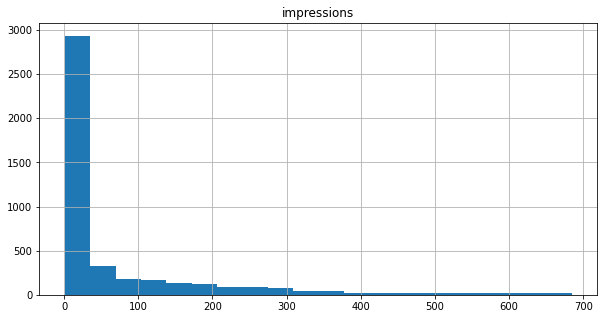

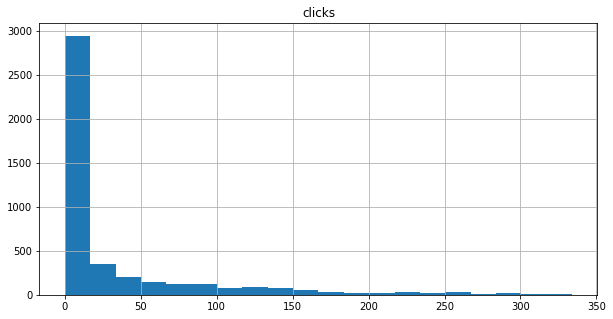

In [ ]:
df_no.columns
f2 = ['impressions', 'clicks', 'cost', 'conversions', 'ctr', 'cpc', 'cpa']
X1 = df_no[f2]
y1 = df_no.revenue
       
#X1 = df_no[f1]  
#y1 = df_no.revenue   
f3 = ['impressions', 'clicks', 'cost', 'conversions','adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4']
df_no2 = df[(df.z_clicks>-3)&(df.z_clicks<3)&(df.z_imp>-3)&(df.z_imp<3)&(df.z_cost>-3)&(df.z_cost<3)&(df.z_conv>-3)&(df.z_conv<3)]
X2 = df_no2[f3]
y2 = df_no2.revenue

f4 = ['impressions', 'clicks', 'cost', 'conversions','adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4','ctr', 'cpc', 'cpa']


df_no.hist(column='impressions',bins=20,figsize=(10,5))
df_no.hist(column='clicks',bins=20,figsize=(10,5))

In [ ]:
#df = df.reset_index()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
pf = pd.read_csv('Test_Data.csv')
pf['ctr'] = (pf.clicks)/pf.impressions
pf['cpc'] = pf.cost/pf.clicks
pf['cpa'] = pf.cost/pf.conversions
pf.replace([np.inf, -np.inf], np.nan, inplace=True)
pf.fillna(pf.median(),inplace=True)
print(pf.describe())
print(pf.isnull().sum())

             cost  impressions      clicks  ...         ctr         cpc         cpa
count  318.000000   318.000000  318.000000  ...  318.000000  318.000000  318.000000
mean     0.381352    67.144654   29.720126  ...    0.444215    0.013195    0.409093
std      0.591480   101.078870   45.200014  ...    0.254377    0.004077    0.299648
min      0.000000     1.000000    0.000000  ...    0.000000    0.010000    0.010000
25%      0.020000     4.000000    2.000000  ...    0.333333    0.011341    0.356667
50%      0.105000    20.000000    9.000000  ...    0.441969    0.012500    0.356667
75%      0.490000   103.000000   40.750000  ...    0.533614    0.014000    0.356667
max      3.530000   589.000000  276.000000  ...    2.000000    0.060000    3.360000

[8 rows x 7 columns]
date           0
campaign       0
adgroup        0
ad             0
cost           0
impressions    0
clicks         0
conversions    0
ctr            0
cpc            0
cpa            0
dtype: int64


In [ ]:
pf['ad'] =  pf['ad'].str.replace(' ','_')

In [ ]:

def clean_dataset(pf):
    assert isinstance(pf, pd.DataFrame), "df needs to be a pd.DataFrame"
    pf.dropna(inplace=True)
    indices_to_keep = ~pf.isin([np.nan, np.inf, -np.inf]).any(1)
    return pf[indices_to_keep].astype(np.float64)

In [ ]:
test_X = pf[f1]

In [ ]:

#test_X = pd.get_dummies(test_X)
test_X1 = pf[f2]
test_X2 = pf[f3]
test_X.columns

Index(['impressions', 'clicks', 'cost', 'conversions', 'adgroup 1',
       'adgroup 2', 'adgroup 3', 'adgroup 4'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_X)
model1 = RandomForestRegressor(random_state=1)
model1.fit(X_train_scaled,y)
ans1 = model1.predict(X_test_scaled)

In [ ]:
test_x5 = pf['conversions']
train_x5 = df['conversions']
model1 = RandomForestRegressor(random_state=1)
model1.fit(train_x5,y)
ans1 = model1.predict(test_x5)

ValueError: ignored

In [ ]:
#keras regression
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

df1 = df.copy()
df1.describe().transpose()
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(df1[f1]))
print(normalizer.mean.numpy())

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(df1[f1])
linear_model.layers[1].kernel
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
#%%time
history = linear_model.fit(
    X,y, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

[92.63575    43.34082     2.8008335   1.3390944   0.28746447  0.15904617
  0.36578426  0.18770517]


In [ ]:
ans3 = linear_model.evaluate(
    pf[f1],test_X, verbose=0)
result4 = pd.DataFrame(ans3)
#res = pd.DataFrame(predictions)## #preditcions are nothing but the final predictions of your model on input features of your new unseen test data

result4.columns = ['revenue']

# To download the csv file locally
from google.colab import files
result4.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

ValueError: ignored

In [ ]:
df.dtypes

date            object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
ctr            float64
cpc            float64
cpa            float64
adgroup 1        uint8
adgroup 2        uint8
adgroup 3        uint8
adgroup 4        uint8
dtype: object

In [ ]:
ans1

array([4.64820391, 5.67606864, 5.67606864, 5.67606864, 5.67606864,
       5.67606864, 4.54197283, 5.67606864, 3.76773027, 5.67606864,
       5.71571774, 5.67606864, 5.67606864, 5.75228098, 5.67606864,
       4.324346  , 5.67606864, 4.06082102, 5.67606864, 4.25995715,
       5.67606864, 5.67606864, 5.67606864, 5.91255576, 5.67606864,
       5.67606864, 6.09834076, 4.98655393, 5.67606864, 5.67606864,
       5.72383769, 5.67606864, 6.6402547 , 5.27181586, 4.96352324,
       5.67606864, 4.07348177, 5.67606864, 5.67606864, 5.67606864,
       5.67606864, 5.67606864, 5.67606864, 5.67606864, 5.67606864,
       5.67606864, 5.67606864, 5.67606864, 5.67606864, 5.67606864,
       5.67606864, 5.67606864, 5.67606864, 5.36248676, 5.24779356,
       4.9156804 , 5.67606864, 5.67606864, 5.67606864, 6.69827891,
       5.67606864, 5.66528805, 5.67606864, 5.33347063, 5.67606864,
       5.67606864, 5.76158224, 4.74573528, 5.67606864, 5.67606864,
       5.08756787, 5.67606864, 5.67606864, 5.67606864, 4.27587

In [ ]:
result = pd.DataFrame(ans1)
#res = pd.DataFrame(predictions)## #preditcions are nothing but the final predictions of your model on input features of your new unseen test data

result.columns = ['revenue']

# To download the csv file locally
from google.colab import files
result.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
result.head

<bound method NDFrame.head of             0
0    130.0658
1      0.0000
2      0.0000
3      0.0000
4      0.0000
..        ...
313    0.0000
314    0.0000
315    0.0000
316    0.0000
317  212.8630

[318 rows x 1 columns]>

In [ ]:
result.head

<bound method NDFrame.head of       revenue
0    130.0658
1      0.0000
2      0.0000
3      0.0000
4      0.0000
..        ...
313    0.0000
314    0.0000
315    0.0000
316    0.0000
317  212.8630

[318 rows x 1 columns]>

In [ ]:
new_test_data = pd.read_csv("testing_set_label.csv" )

NameError: ignored

In [ ]:
dk1 = pd.read_csv('https://www.epa.gov/sites/production/files/2015-10/huddscol.txt', sep="	")

In [ ]:
dk1.head

<bound method NDFrame.head of         JPN15col.txt Japanese15 Dynamometer Driving Schedule
0    Test Time, secs                      Vehicle Speed, kph
1                  0                                       0
2                  1                                       0
3                  2                                       0
4                  3                                       0
..               ...                                     ...
228              227                                       0
229              228                                       0
230              229                                       0
231              230                                       0
232              231                                       0

[233 rows x 2 columns]>

In [ ]:
dk1.head(100)

,HUDDSCOL.TXT,HDUDDS - Urban Dynamometer Driving Schedule for
0,Heavy Duty Vehicles,NaN
1,"Test Time, secs","Vehicle Speed, mph"
2,0,0
3,1,0
4,2,0
...,...,...
95,93,21
96,94,21.11
97,95,23.84
98,96,27


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


traina,testa,trainb,testb = train_test_split(X,y,test_size=.33,random_state=47)
m2 = RandomForestRegressor(random_state=101)
m2.fit(traina,trainb)
pred1 = m2.predict(testa)
m3 = DecisionTreeRegressor(random_state=0)
m3.fit(traina,trainb)
pred2 = m3.predict(testa)
print(mean_absolute_error(testb,pred1))
print(mean_absolute_error(testb,pred2))


78.610539441131
99.68607687210071


In [ ]:
pf.head

NameError: ignored

In [ ]:
#df = df.fillna(df.median())
#df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df.replace([np.inf, -np.inf], np.nan)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,ctr,cpc,cpa
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,NaN
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,NaN
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,NaN
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225
...,...,...,...,...,...,...,...,...,...,...,...,...
4566,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00,0.315789,0.011667,NaN
4567,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00,0.000000,NaN,NaN
4568,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20,0.500000,0.015000,0.1200
4569,28-02-2021,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00,0.351351,0.017692,NaN


In [ ]:
df = df.fillna(df.median())
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
ctr            0
cpc            0
cpa            0
z_clicks       0
z_imp          0
z_ctr          0
z_cpc          0
z_cost         0
z_conv         0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn import linear_model
svr = SVR()

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X1)
#X_test_scaled = scaler.transform(test_X)
#model3 = LogisticRegression(random_state=1)
#model3.fit(X,y)

model4 = SVR(C=100.0)
model4.fit(X_train_scaled,y)

##model5.fit(X,y)
ans2 = model4.predict(X_test_scaled)
result2 = pd.DataFrame(ans2)
#res = pd.DataFrame(predi#ctions)## #preditcions are nothing but the final predictions of your model on input features of your new unseen test data

result2.columns = ['revenue']

result2.revenue = (1/result2.revenue)-1
# To download the csv file locally
from google.colab import files
result2.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train_scaled


array([[-0.34607183, -0.37283444, -0.18947246, ..., -0.43488609,
        -0.75944098, -0.4807078 ],
       [-0.46204131, -0.43274221, -0.19504348, ...,  2.29945272,
        -0.75944098, -0.4807078 ],
       [-0.40153549, -0.3928037 , -0.19225797, ..., -0.43488609,
         1.31675802, -0.4807078 ],
       ...,
       [-0.38640904, -0.35286519, -0.18668696, ..., -0.43488609,
         1.31675802, -0.4807078 ],
       [-0.28052386, -0.30294205, -0.17902682, ..., -0.43488609,
        -0.75944098, -0.4807078 ],
       [-0.37128259, -0.33289593, -0.18529421, ..., -0.43488609,
        -0.75944098, -0.4807078 ]])

In [ ]:
# Regression Example With Boston Dataset: Standardized and Wider
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))
ans3 = model6.predict(test_X2)
result3 = pd.DataFrame(ans3)
#res = pd.DataFrame(predi#ctions)## #preditcions are nothing but the final predictions of your model on input features of your new unseen test data

result3.columns = ['revenue']

# To download the csv file locally
from google.colab import files
result3.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import keras
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

#feature_cols = training_set[FEATURES]
#labels = training_set[LABEL].values

model.fit(np.array(X_train_scaled), np.array(y), epochs=100, batch_size=10)

Epoch 1/100
458/458 [==============================] - 1s 1ms/step - loss: 1029481.6398
Epoch 2/100
458/458 [==============================] - 1s 1ms/step - loss: 1151508.1302
Epoch 3/100
458/458 [==============================] - 1s 1ms/step - loss: 1123789.8294
Epoch 4/100
458/458 [==============================] - 1s 1ms/step - loss: 1259388.8523
Epoch 5/100
458/458 [==============================] - 1s 1ms/step - loss: 1271247.1988
Epoch 6/100
458/458 [==============================] - 1s 1ms/step - loss: 1318925.7430
Epoch 7/100
458/458 [==============================] - 1s 1ms/step - loss: 1190785.1156
Epoch 8/100
458/458 [==============================] - 1s 1ms/step - loss: 1657331.1578
Epoch 9/100
458/458 [==============================] - 1s 1ms/step - loss: 1232464.4195
Epoch 10/100
458/458 [==============================] - 1s 1ms/step - loss: 849530.5034
Epoch 11/100
458/458 [==============================] - 1s 1ms/step - loss: 1321213.6195
Epoch 12/100
458/458 [=========

In [ ]:
ans6 = model.predict(np.array(X_test_scaled))
result6 = pd.DataFrame(ans6)
#res = pd.DataFrame(predi#ctions)## #preditcions are nothing but the final predictions of your model on input features of your new unseen test data

result6.columns = ['revenue']

# To download the csv file locally
from google.colab import files
result6.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>